# Notebook Kelompok 18 Proyek MA3271 Pemodelan Matematika 
* Topik : Pemodelan Biaya Magnetic Resonance Imaging (MRI)
* Kelompok 18 : 
  * 10119001 - Sekar Annasya H
  * 10119013 - Alfini Ridatillah
  * 10119015 - Alfina Rahmadina
  * 10119055 - Muhammad Pudja Gemilang
  * 10119111 - Andika Zidane Faturrahman
* Notebook ini membahas pemodelan premi asuransi kesehatan khusus MRI untuk setiap pasien serta menentukan rate of return dari investasi di pelayanan jasa MRI
* Asumsi yang digunakan :    
  * Biaya yang digunakan adalah biaya masa kini
  * Jumlah klaim antara 1, 2 atau berbanding lurus dengan total biaya 
  * Suku bunganya adalah 8.17% per tahun (Berdasarkan web Prudential)



## Import Package dan Dataset
Keterangan package yang digunakan dan kegunaannya
* **pandas** : Import data dan melakukan manipulasi dataset 
* **matplotlib** dan **seaborn** : Visualisasi data
* **numpy** : Menerapkan basic aljabar linear, statistika dan operasi matematika secara umum




In [ ]:
# Import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Gunakan style ggplot dalam visualisasi
plt.style.use('ggplot')

# Import dataset
df = pd.read_excel('Data MRI.xlsx')

# Print jenis kolom
df.columns

Index(['rtglast', 'umur', 'bl_th', 'rjenis', 'rnmbos', 'biaya', 'biaya3',
       'rdisc', 'bayar', 'selisih', 'selisihx', 'bayarx', 'rkdjasa', 'rnmjasa',
       'rfee', 'diskon', 'disc', 'total_biaya_pelayanan'],
      dtype='object')

In [ ]:
# Menampilkan 5 data pasien teratas
df.head()

,rtglast,umur,bl_th,rjenis,rnmbos,biaya,biaya3,rdisc,bayar,selisih,selisihx,bayarx,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan
0,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,0,4400000,0,0,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000
1,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,0,4400000,0,0,4400000,900006,CERVICAL,2200000,0,0,2200000
2,04-Jan-11,70.0,Tahun,L,Pribadi,2200000,2200000,0,2200000,0,0,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000
3,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,0,3200000,0,0,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000
4,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,0,3200000,0,0,3200000,900046,KONTRAS I,1000000,0,0,1000000


In [ ]:
df.drop(['rdisc','bayar','selisih','selisihx','bayarx'], axis = 1, inplace = True)

In [ ]:
df.head()

,rtglast,umur,bl_th,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan
0,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000
1,03-Jan-11,54.0,Tahun,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000
2,04-Jan-11,70.0,Tahun,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000
3,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000
4,04-Jan-11,49.0,Tahun,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000


Keterangan dataset
* rtglast : Tanggal kunjungan pasien
* umur : Umur pasien
* bl_th : Satuan dari umur pasien
* rjenis : Jenis kelamin pasien (L : laki-laki, P : perempuan)
* rnmbos : Jenis jaminan biaya pasien (Pribadi, RS)
* biaya : Biaya total pengobatan pasien setelah didiskon
* biaya3 : Biaya total pengobatan pasien sebelum didiskon
* bayar dan bayarx : Besar nominal pembayaran oleh pasien atas tagihan/klaim
* selisih dan selisihx : Sisa pembayaran
* rkdjasa : Kode unik jenis pelayanan klinik yang diambil oleh pasien
* rnmjasa : Jenis pelayanan klinik yang diambil oleh pasien
* rfee : Besar biaya pelayanan klinik yang diambil oleh pasien
* diskon & disc : Besar diskon biaya pelayanan klinik yang diambil oleh pasien
* total_biaya_pelayanan : Biaya yang harus dibayar oleh pasien terkait pelayanan klinik

## Data Cleaning

### Konversi usia 

Untuk memudahkan perhitungan nanti, pasien dengan satuan umur bulan akan diubah menjadi satuan tahun dengan membagi umur tersebut dengan 12

In [ ]:
def konversi_umur(df):
  # Fungsi konversi umur bulan ke tahun
  for i in range(len(df)):
    if df['bl_th'][i] == 'Bulan':
      df['umur'][i] = np.floor(df['umur'][i]/12)
    else:
      continue
  
  return df

In [ ]:
# Terapkan fungsi pada dataset
df = konversi_umur(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Drop fitur bl_th karena redundant
df.drop(['bl_th'], axis = 1, inplace = True)

In [ ]:
# Tampilkan kembali 5 data teratas
df.head()

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000
2,04-Jan-11,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000
3,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000
4,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000


## Bagi Kategori

Dalam perhitungan premi nanti, perlu mengklasifikasikan umur setiap pasien terhadap selang umur yang ditetapkan

In [ ]:
# Buat kolom baru berisi selang umur di mana umur pasien tersebut berada
df['selang_umur'] = pd.qcut(df['umur'], 10)

# Print hasilnya
df['selang_umur'].to_frame()

,selang_umur
0,"(53.0, 57.0]"
1,"(53.0, 57.0]"
2,"(69.0, 91.0]"
3,"(48.0, 53.0]"
4,"(48.0, 53.0]"
...,...
4616,"(-0.001, 14.0]"
4617,"(53.0, 57.0]"
4618,"(53.0, 57.0]"
4619,"(14.0, 27.0]"


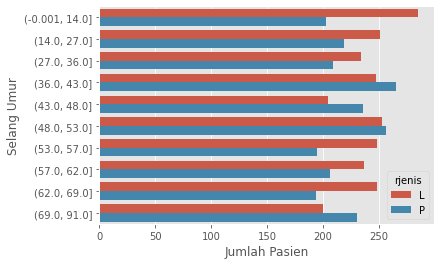

In [ ]:
sns.countplot(data = df, y = 'selang_umur', hue = 'rjenis')
plt.xlabel("Jumlah Pasien")
plt.ylabel("Selang Umur")
plt.show()

Dapat dilihat dari bar plot di atas, jumlah pasien laki-laki berusia 0 - 14 tahun paling banyak, sementara jumlah pasien perempuan berusia 36 - 43 tahun paling banyak 

## Exploratory Data Analysis (EDA)

### Distribusi Biaya Pasien

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


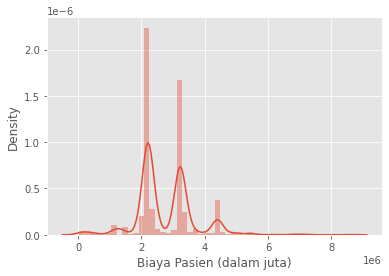

In [ ]:
# Melakukan visualisasi data
import seaborn as sns

sns.distplot(df['biaya'])
plt.xlabel("Biaya Pasien (dalam juta)")
plt.show()

Distribusinya cenderung menceng kanan dengan pasien di klinik tersebut rata-rata  biaya pemeriksaannya adalah Rp 2 juta sampai dengan 3 juta

### Rentang Usia Pasien

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


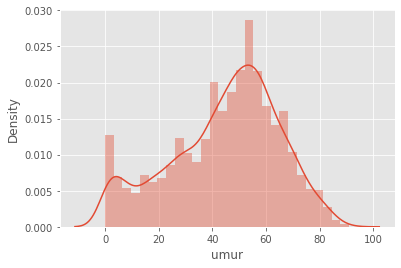

In [ ]:
# Melakukan visualisasi data
import seaborn as sns

sns.distplot(df['umur'])
plt.show()

Kebanyakan pasien yang mengunjungi klinik tersebut berusia 40 - 60 tahun

## Besar Klaim rata-rata per kategori

### Group by rerata total klaim

Akan ditentukan besar klaim rata-rata dari setiap selang umur

In [ ]:
df.head()

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan,selang_umur
0,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(53.0, 57.0]"
1,03-Jan-11,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000,"(53.0, 57.0]"
2,04-Jan-11,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(69.0, 91.0]"
3,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000,"(48.0, 53.0]"
4,04-Jan-11,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000,"(48.0, 53.0]"


In [ ]:
# Definisikan total biaya pengobatan sebagai biaya3 (biaya keseluruhan pengobatan pasien)
df['total_biaya'] = df['biaya3']

In [ ]:
df['rnmjasa'] = df['rnmjasa'].apply(lambda string : string.strip())
df['rnmjasa'].unique()

array(['LUMBOSACRAL', 'CERVICAL', 'MRA 1 REGIO', 'KONTRAS I', 'KEPALA',
       'WHOLE ABDOMEN', 'THORACAL', 'ANGIOGRAPHY PAKET I',
       'ANGIOGRAPHY PAKET II', 'GENU', 'TINDAKAN ANASTESI', 'FEMUR',
       'THORACO LUMBAL', 'SHOULDER', 'ABDOMEN + MRCP', 'CERVICO THORACAL',
       'WHOLE SPINE', 'ABDOMEN ATAS', 'HIP / COXAE', 'PELVIC',
       'GENU DEXTRA', 'GENU SINISTRA', 'TAMBAHAN FILM', 'FEMUR (MASKIN)',
       'WRIST (MASKIN)', 'GENU (MASKIN)', 'MANUS', 'Oksigen', 'ANKLE',
       'RADIOLOGI (KONSULTASI)', 'KEPALA CANGGIH', 'KONTRAS II', 'REVIEW',
       'THORACO LUMBAL(MASKIN', 'MP KEPALA', 'HUMERUS', 'ADMINISTRASI',
       'LUMBOSACRAL (MASKIN)', 'THORACOLUMBAL(MASKIN)',
       'CERVICAL (MASKIN)', 'Pelvic', 'THORACAL (MASKIN)', 'Abdomen Atas',
       'ABDOMEN + MRCP (MASKI', 'KONSULTASI RADIOLOGI', 'CRANIO CERVICAL',
       'HUMERUS (MASKIN)', 'THORACOLUMBAL(JAMKESM', 'TRANSLATE',
       'CRURIS (MASKIN)', 'CD', 'KEPALA+KONTRAS(MOU SOETOM',
       'ANKLE (JAMKESMAS)', 'LUMBOSACR

In [ ]:
import re

kal = 'MRA 1 REGIO'
kal_baru = re.sub(r'(WHOLE|SINISTRA|DEXTRA|PAKET\sI{0,2}|CANGGIH|MP|ATAS|BAWAH|\sI{0,2})','',kal)
print(kal_baru)

MRA1REGIO


In [ ]:
# Bersih-bersih string
def layanan_cleaner(sentence):
  # Membersihkan string layanan
  sentence = sentence.upper()
  sentence = re.sub(r'\s*\(\w+(\s|-)*\w+\)*','',sentence)
  sentence = re.sub(r'(WHOLE|SINISTRA|DEXTRA|PAKET\sI{0,2}|CANGGIH|MP|ATAS|BAWAH)','',sentence)
  sentence = re.sub(r'\s*\+\s*\w+','',sentence)
  sentence = sentence.strip()
  return sentence

In [ ]:
df['rnmjasa'] = df['rnmjasa'].apply(layanan_cleaner)
df['rnmjasa'] = df['rnmjasa'].replace(['KONTRAS I','KONTRAS II'], 'KONTRAS')

In [ ]:
len(df['rnmjasa'].unique())

39

In [ ]:
df['rnmjasa'].value_counts().to_frame()

,rnmjasa
KEPALA,1296
LUMBOSACRAL,784
KONTRAS,739
CERVICAL,397
ANGIOGRAPHY,341
TINDAKAN ANASTESI,201
TAMBAHAN FILM,141
GENU,123
THORACO LUMBAL,119
ABDOMEN,92


In [ ]:
def biaya_rata_rata(kategori):
  # Subset data
  kategori_df = df[df['rnmjasa'] == kategori]

  # Group by berdasarkan umur
  kategori_umur_df = kategori_df.groupby(['selang_umur'])['total_biaya'].mean()

  # Print hasilnya
  return kategori_umur_df.to_frame()

biaya_rata_rata('KEPALA').index

CategoricalIndex([(-0.001, 14.0],   (14.0, 27.0],   (27.0, 36.0],
                    (36.0, 43.0],   (43.0, 48.0],   (48.0, 53.0],
                    (53.0, 57.0],   (57.0, 62.0],   (62.0, 69.0],
                    (69.0, 91.0]],
                 categories=[(-0.001, 14.0], (14.0, 27.0], (27.0, 36.0], (36.0, 43.0], (43.0, 48.0], (48.0, 53.0], (53.0, 57.0], (57.0, 62.0], ...], ordered=True, dtype='category', name='selang_umur')

## Premi

Pada bagian ini, akan ditentukan besar premi untuk setiap pasiennya. Pada bagian premi level akan ditampilkan visualisasi biaya premi beserta biaya pasien dari sampel yang diambil dari data tersebut dengan usia yang berbeda antar pasiennya

### Perhitungan premi tanpa menggunakan produk asuransi tertentu

Kasus 1 adalah jika perhitungan premi murni menggunakan informasi dari datanya, yakni menggunakan rumus premi alami

$\Pi_x = \overline{n}_x \overline{y}_x (1+i)^{-1/2}$ (Untuk kasus 1.1, 1.2)

$\Pi_x = \overline{n}_x y_x (1+i)^{-1/2}$ (Untuk kasus 1.3)

dengan :   

*   $\Pi_x$ : Besar premi alami untuk pasien ke-$x$
*   $\overline{n}_x$ : Rata-rata jumlah klaim/tagihan pasien ke-$x$ di selang umurnya
*   $\overline{y}_x$ : Rata-rata besar biaya klaim/tagihan pasien ke-$x$ di selang umurnya
* $y_x$ : Besar biaya klaim/tagihan pasien ke-$x$
* $i$ : Besar suku bunga dalam 1 tahun (Asumsi $i = 8.27%$)

Premi level adalah nilai rataan dari premi alami berdasarkan selang yang telah ditentukan


#### Premi Hitung

Dalam hal ini digunakan rumus yang kedua pada deskripsi premi di atas

In [ ]:
df['rnmjasa'].value_counts().to_frame().sort_values(by = 'rnmjasa').reset_index()

,index,rnmjasa
0,PEDIS,1
1,MIDAZOLAM,1
2,IV CATETER,1
3,MRA 1 REGIO,2
4,TRANSLATE,2
5,WRIST,3
6,ELBOW,3
7,KONSULTASI RADIOLOGI,3
8,HUMERUS,4
9,MANUS,4


In [ ]:
class premi_pasien:
  def __init__(self, nama, usia, layanan, biaya_pengobatan, kasus):
    self.nama = nama
    self.usia = usia
    self.layanan = layanan
    self.biaya_pengobatan = biaya_pengobatan
    self.kasus = kasus
    
    # Subset data
    data = df[df['rnmjasa'] == self.layanan]

    # Group by Total Biaya
    df1 = data.groupby(['selang_umur'])['total_biaya'].agg('mean')
    dict_besar_klaim = df1.to_dict()
    
    data['besar_klaim_per_segmen'] = data['selang_umur'].map(dict_besar_klaim).astype('float64')

    if self.kasus == 'KASUS 1.1':
      data['jumlah_klaim'] = data['total_biaya']//data['rfee']

      # Segmentasi jumlah klaim berdasarkan selang umur
      df2 = data.groupby(['selang_umur'])['jumlah_klaim'].agg('mean')
      dict_jumlah_klaim = df2.to_dict()
      data['jumlah_klaim_per_segmen'] = data['selang_umur'].map(dict_jumlah_klaim).astype('float64')

      data['natural_premium'] = data['besar_klaim_per_segmen']*data['jumlah_klaim_per_segmen']*(1+(8.17/100))**(-1/2)

    elif self.kasus == 'KASUS 1.2':
      # Buat fitur baru
      data['jumlah_klaim'] = 0

      # Tentukan jumlah klaim berdasarkan asumsi tersebut
      for i in range(len(df)):
        if data['biaya'][i] == data['rfee'][i]:
          data['jumlah_klaim'][i] = 1
        else:
          data['jumlah_klaim'][i] = 2    

       # Segmentasi jumlah klaim berdasarkan selang umur
      df2 = data.groupby(['selang_umur'])['jumlah_klaim'].agg('mean')
      dict_jumlah_klaim = df2.to_dict()
      data['jumlah_klaim_per_segmen'] = data['selang_umur'].map(dict_jumlah_klaim).astype('float64')
      data['natural_premium'] = data['besar_klaim_per_segmen']*data['jumlah_klaim_per_segmen']*(1+(8.17/100))**(-1/2)
    
    elif self.kasus == 'KASUS 1.3':
      data['natural_premium'] = 2*data['total_biaya']*(1+(8.17/100))**(-1/2)

    else :
      raise TypeError("Pilih kasus berdasarkan pilihan : KASUS 1.1, KASUS 1.2, KASUS 1.3")

    data['selisih_klaim_premi'] = data['natural_premium'] - data['total_biaya']
    data['persentase_selisih'] = data['selisih_klaim_premi']/data['total_biaya']*100

    # Definisikan premi level
    df3 = data.groupby(['selang_umur'])['natural_premium'].agg('mean')
    dict_premi_level = df3.to_dict()
    data['level_premium'] = data['selang_umur'].map(dict_premi_level).astype('float64')

    self.data = data
    self.df3 = df3

  def introduksi_pasien(self):
    # Perkenalan pasien
    kalimat = "Pasien bernama {0}, berusia {1} dan berobat di klinik MRI untuk pelayanan {2} dengan biaya pengobatan Rp{3}".format(self.nama, self.usia,
                                                                                                                   self.layanan, self.biaya_pengobatan)
    return kalimat

  def premi_yang_dibayarkan(self):
    i = 0
    while self.usia not in self.df3.index[i]:
      i += 1
    
    if self.usia in self.df3.index[i]:
      premi_level = self.df3[self.df3.index[i]]

    kalimat = "Asumsi pembayaran premi mengikuti {0}, untuk biaya pengobatan Rp{1}, {2} harus membayar premi sebesar Rp{3}".format(self.kasus, self.biaya_pengobatan, self.nama, round(premi_level))
    return kalimat
  
  def dinamika_premi(self):
    # Buat plot premi terhadap total biaya pasien untuk kategori tertentu
    umur_klaim2 = self.data[['umur','total_biaya','besar_klaim_per_segmen','natural_premium','level_premium']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)
    plt.plot(umur_klaim2['umur'], umur_klaim2['total_biaya'], label = 'Jumlah Biaya')
    plt.plot(umur_klaim2['umur'], umur_klaim2['level_premium'], color = 'black', linestyle = '--', label = 'Premi Level')
    plt.plot(umur_klaim2['umur'], umur_klaim2['natural_premium'], label = 'Premi Alami')
    plt.title('Besar klaim dan premi yang ditanggung pasien {}'.format(self.layanan), fontsize = 12)
    plt.xlabel('usia')
    plt.ylabel('besar biaya (puluhan juta rupiah)')
    plt.legend()
    plt.show()

In [ ]:
pasien_1 = premi_pasien("Andika",30,"LUMBOSACRAL",3000000,"KASUS 1.3")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
pasien_1.introduksi_pasien()

'Pasien bernama Andika, berusia 30 dan berobat di klinik MRI untuk pelayanan LUMBOSACRAL dengan biaya pengobatan Rp3000000'

In [ ]:
pasien_1.premi_yang_dibayarkan()

'Asumsi pembayaran premi mengikuti KASUS 1.3, untuk biaya pengobatan Rp3000000, Andika harus membayar premi sebesar Rp4486972'

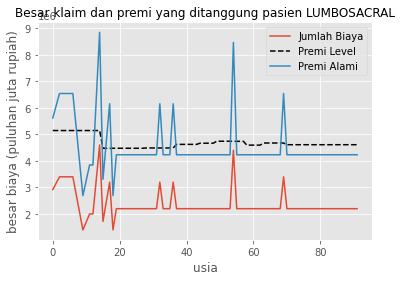

In [ ]:
pasien_1.dinamika_premi()

##### Premi Alami

In [ ]:
data2 = df.copy()
dict_besar_klaim = df1.to_dict()

In [ ]:
df1.to_frame()

,total_biaya
selang_umur,
"(-0.001, 14.0]",3.138637e+06
"(14.0, 27.0]",2.788043e+06
"(27.0, 36.0]",2.690745e+06
"(36.0, 43.0]",2.633242e+06
"(43.0, 48.0]",2.746830e+06
"(48.0, 53.0]",2.708418e+06
"(53.0, 57.0]",2.820068e+06
"(57.0, 62.0]",2.620655e+06
"(62.0, 69.0]",2.761097e+06


In [ ]:
data2['besar_klaim_per_segmen'] = data2['selang_umur'].map(dict_besar_klaim).astype('float64')

In [ ]:
data2['natural_premium'] = data2['total_biaya']*2*(1+(8.17/100))**(-1/2)
data2['selisih_klaim_premi'] = data2['natural_premium'] - data2['total_biaya']
data2['persentase_selisih'] = data2['selisih_klaim_premi']/data2['total_biaya']*100

data2[['total_biaya','natural_premium','selisih_klaim_premi','persentase_selisih']]

,total_biaya,natural_premium,selisih_klaim_premi,persentase_selisih
0,4400000,8.461147e+06,4.061147e+06,92.298803
1,4400000,8.461147e+06,4.061147e+06,92.298803
2,2200000,4.230574e+06,2.030574e+06,92.298803
3,3200000,6.153562e+06,2.953562e+06,92.298803
4,3200000,6.153562e+06,2.953562e+06,92.298803
...,...,...,...,...
4616,1200000,2.307586e+06,1.107586e+06,92.298803
4617,3200000,6.153562e+06,2.953562e+06,92.298803
4618,3200000,6.153562e+06,2.953562e+06,92.298803
4619,3200000,6.153562e+06,2.953562e+06,92.298803


Persentase selisihnya sama karena premi alami dengan total biayannya hampir dua kali lipatnya. Keuntungan model ini, tidak ada pasien yang biaya pengobatannya tidak terkover oleh premi alaminya, tetapi untuk premi levelnya tetap ada pasien yang tidak terkover biayanya dikarenakan distribusi biaya pengobatan yang cukup menceng

##### Premi Level

In [ ]:
df3 = data2.groupby(['selang_umur'])['natural_premium'].agg('mean')
df3

selang_umur
(-0.001, 14.0]    6.035562e+06
(14.0, 27.0]      5.361372e+06
(27.0, 36.0]      5.174270e+06
(36.0, 43.0]      5.063693e+06
(43.0, 48.0]      5.282120e+06
(48.0, 53.0]      5.208256e+06
(53.0, 57.0]      5.422956e+06
(57.0, 62.0]      5.039487e+06
(62.0, 69.0]      5.309557e+06
(69.0, 91.0]      5.068493e+06
Name: natural_premium, dtype: float64

In [ ]:
dict_premi = df3.to_dict()
data2['level_premium'] = data2['selang_umur'].map(dict_premi).astype('float64')

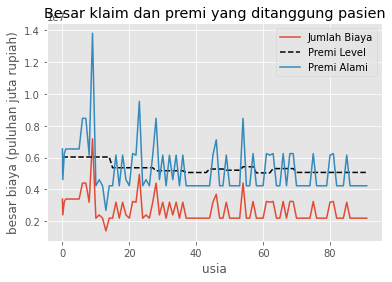

In [ ]:
# Plot klaim untuk user-user dengan usia yang berbeda
umur_klaim2 = data2[['umur','total_biaya','besar_klaim_per_segmen','natural_premium','level_premium']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)
plt.plot(umur_klaim2['umur'], umur_klaim2['total_biaya'], label = 'Jumlah Biaya')
plt.plot(umur_klaim2['umur'], umur_klaim2['level_premium'], color = 'black', linestyle = '--', label = 'Premi Level')
plt.plot(umur_klaim2['umur'], umur_klaim2['natural_premium'], label = 'Premi Alami')
plt.title('Besar klaim dan premi yang ditanggung pasien')
plt.xlabel('usia')
plt.ylabel('besar biaya (puluhan juta rupiah)')
plt.legend()
plt.show()

Bisa dilihat bahwa premi levelnya tidak dapat mengkover biaya pengobatan pasien yang merupakan pencilan. Keuntungannya adalah hanya 1 pasien yang tidak terkover biayanya

List Biaya :
- Biaya listrik 
- Biaya pelayanan dokter (?)
- Biaya maintenance MRI (?) 
- Biaya beli MRI

### Jika menggunakan asuransi smart health care premier plus

Premi untuk pelayanan MRI ditentukan dari besar tagihan dari pasien tersebut, jadi besar preminya akan sama dengan tagihan pasien tersebut. Premi level dapat ditentukan dari rataan klaim per segmennya

In [ ]:
df1 = df.groupby(['selang_umur'])['total_biaya'].agg('mean')
dict_besar_klaim = df1.to_dict()

In [ ]:
df['besar_klaim_per_segmen'] = df['selang_umur'].map(dict_besar_klaim)

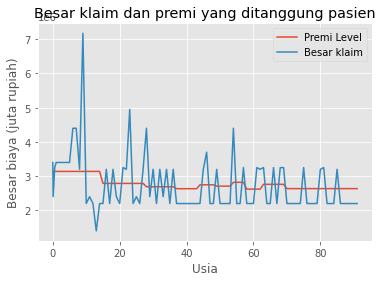

In [ ]:
umur_klaim = df[['umur','besar_klaim_per_segmen','total_biaya']].drop_duplicates(subset = ['umur']).sort_values(by=['umur'], ascending = True)

plt.plot(umur_klaim['umur'], umur_klaim['besar_klaim_per_segmen'], label = 'Premi Level')
plt.plot(umur_klaim['umur'], umur_klaim['total_biaya'], label = 'Besar klaim')

plt.title('Besar klaim dan premi yang ditanggung pasien')
plt.xlabel('Usia')
plt.ylabel('Besar biaya (juta rupiah)')
plt.legend()
plt.show()

Sebagian besar klaimnya tidak terkover oleh premi levelnya, 

## Fungsi Biaya

Pada bagian ini akan ditentukan rate of return dari investasi di pelayanan jasa MRI, bagian ini akan dibagi menjadi 3, biaya pemasukan, biaya pengeluaran dan rate of returnnya

### Pemasukan

#### Kasus 2.1 : Jika total pendapatan dari biaya pasien

In [ ]:
total_pendapatan = df['biaya'].sum()
print(total_pendapatan)

12714276750


Total pendapatannya adalah Rp12.714.276.750,00 murni dari biaya pengobatan pasien dari data tsb

#### Kasus 2.2 : Jika total pendapatan dari premi kasus 1.3

In [ ]:
total_pendapatan_1 = data2['level_premium'].sum()
print(total_pendapatan_1)

24486286347.984447


Total pendapatannya adalah Rp24.486.286.348 (24 miliar rupiah) jika menggunakan premi kasus ketiga

#### Kasus 2.3 : Jika total pendapatannya dari premi asuransi Smart Health Care Premier Plus

In [ ]:
total_pendapatan_2 = df['besar_klaim_per_segmen'].astype('float64').sum()
print(total_pendapatan_2)

12733457500.0


Total pendapatannya adalah Rp12.733.457.500 (12 miliar rupiah) jika menggunakan premi Smart Health Care Premier Plus



#### Kasus 2.4 : Jika mengikuti kasus 1.1

In [ ]:
total_pendapatan_3 = data['level_premium'].astype('float64').sum()
print(total_pendapatan_3)

35160208562.0134


Total pendapatannya adalah Rp35.160.208.562 (35 miliar rupiah)

#### Kasus 2.5 : Jika mengikuti kasus 1.2

In [ ]:
total_pendapatan_4 = data1['level_premium'].astype('float64').sum()
print(total_pendapatan_4)

18155355038.55027


Total pendapatannya adalah Rp18.155.355.038 (18 Miliar rupiah)

### Pengeluaran

#### Rata-rata Penggunaan Listrik MRI per harinya

Asumsi 1 hari ada 32 pasien yang datang ke klinik (dengan mengambil jumlah pasien terbanyak dalam 1 hari), besar daya MRI 3T diketahui 
7160.31 watt/jam

In [ ]:
print("Jumlah kehadiran pasien :",df['rtglast'].value_counts().sort_values(ascending = False))
print("Rata-rata kehadiran pasien :", np.floor(df['rtglast'].value_counts().values.mean()))

Jumlah kehadiran pasien : 11-Oct-11    32
23-Nov-11    29
16-Nov-11    25
07-Jul-11    25
14-Oct-11    25
             ..
30-Apr-11     6
27-Aug-11     5
20-Aug-11     5
07-May-11     2
03-Jan-11     2
Name: rtglast, Length: 298, dtype: int64
Rata-rata kehadiran pasien : 15.0


In [ ]:
# per hari
besar_watt = 32*(7/60)*7160.31
total_biaya_listrik = (besar_watt/1000)*1114.74
print("Total biaya listrik per hari : ",total_biaya_listrik)

Total biaya listrik per hari :  29799.03348576


In [ ]:
# Per tahun
print("Total biaya per tahun : ",total_biaya_listrik*365)

Total biaya per tahun :  10876647.2223024


Biaya listrik per tahun dengan asumsi sebelumnya adalah Rp10.876.648

#### Biaya alat MRI

Jika menggunakan MRI 3T Signa Pioneer maka harga 1 alatnya adalah 
Rp20.479.004.321



#### Biaya Penanganan Dokter

* New Brain Clinic :
  * Rehabilitasi Medis : Rp200.000/sesi
  * Saraf : Rp200.000/sesi
* Umum : Rp250.000 - Rp750.000/sesi


#### Biaya Maintenance MRI

Biaya maintenance MRI ada di kisaran 29 juta - 144 juta, untuk 3T ada di 144 juta

### Rate of Return
Asumsi :    
- Jumlah pasien 32 dalam suatu hari
- Menggunakan 1 alat MRI
- Modal hanya berasal dari pengadaan 1 alat MRI


In [ ]:
# Worst case:
biaya_listrik = total_biaya_listrik
biaya_alat_MRI = 20479004321
biaya_penanganan_dokter = 312*32*200000 # dalam waktu kerja ada 312 hari dan asumsi 32 pasien dalam 1 hari
biaya_maintenance = 4*144*10**6 # Asumsi maintenance 144 juta untuk setiap kuartal (1 tahun ada 4 kuartal)
total_biaya_pengeluaran = biaya_listrik + biaya_alat_MRI + biaya_penanganan_dokter + biaya_maintenance
print("Total Pengeluaran : ", total_biaya_pengeluaran)
print("Total Pemasukan dari biaya pengobatan saja: ", total_pendapatan)
print("Total Pemasukan dari premi level kasus 1.1: ", total_pendapatan_3)
print("Total Pemasukan dari premi level kasus 1.2: ", total_pendapatan_4)
print("Total Pemasukan dari premi level kasus 1.3: ", total_pendapatan_1)
print("Total Pemasukan dari premi Smart Health Care Plus: ", total_pendapatan_2)
print("")

## Persentase keuntungan/kerugian
persen_keuntungan = (total_pendapatan - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_1 = (total_pendapatan_1 - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_2 = (total_pendapatan_2 - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_3 = (total_pendapatan_3 - total_biaya_pengeluaran)/biaya_alat_MRI * 100
persen_keuntungan_4 = (total_pendapatan_4 - total_biaya_pengeluaran)/biaya_alat_MRI * 100

print("Persentase keuntungan dalam 1 tahun jika dari biaya pengobatan saja: ",persen_keuntungan)
print("Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.1 : ", persen_keuntungan_3)
print("Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.2 : ", persen_keuntungan_4)
print("Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.3 : ", persen_keuntungan_1)
print("Persentase keuntungan dalam 1 tahun jika dari premi Smart Health Care Plus : ", persen_keuntungan_2)

Total Pengeluaran :  23051834120.033485
Total Pemasukan dari biaya pengobatan saja:  12714276750
Total Pemasukan dari premi level kasus 1.1:  35160208562.0134
Total Pemasukan dari premi level kasus 1.2:  18155355038.55027
Total Pemasukan dari premi level kasus 1.3:  24486286347.984447
Total Pemasukan dari premi Smart Health Care Plus:  12733457500.0

Persentase keuntungan dalam 1 tahun jika dari biaya pengobatan saja:  -50.47880848109855
Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.1 :  59.12579660703277
Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.2 :  -23.909751688768225
Persentase keuntungan dalam 1 tahun jika dari premi level kasus 1.3 :  7.00450180812754
Persentase keuntungan dalam 1 tahun jika dari premi Smart Health Care Plus :  -50.38514792173076


Bisa dilihat bahwa jika klinik hanya menggunakan biaya pengobatan saja atau menggunakan premi Smart Health Care Plus maka mengalami kerugian sebesar -50% tapi jika klinik tersebut menetapkan premi level di kasus 1.3, maka keuntungannya sebesar 7.0%

Jika menetapkan premi kasus 1.1, maka mendapatkan keuntungan 59%, tetapi perlu diingat bahwa premi yang ditetapkan jauh lebih tinggi dibandingkan biaya pengobatannya

Premi kasus 1.2 mendatangkan kerugian yang lebih kecil dibandingkan biaya pengobatan dan Smart Health Care Premier Plus

# Data Deret Waktu per Tanggal

Kolom2nya:
1. Tanggal
2. Pendapatan/pemasukan
  * Bayar MRI make premi atau biaya aslinya
3. Pengeluaran 
  * Biaya rata2 penggunaan listrik (tiap hari)
  * Biaya penanganan dokter (tiap hari kerja)
  * Biaya maintenance MRI (tiap kuartal)

Asumsi udah beli alat MRI 

## Kasus 2.1

In [ ]:
df.head()

,rtglast,umur,rjenis,rnmbos,biaya,biaya3,rkdjasa,rnmjasa,rfee,diskon,disc,total_biaya_pelayanan,selang_umur,total_biaya,besar_klaim_per_segmen
0,2011-01-03,54.0,L,Pribadi,4400000,4400000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000,2.820068e+06
1,2011-01-03,54.0,L,Pribadi,4400000,4400000,900006,CERVICAL,2200000,0,0,2200000,"(53.0, 57.0]",4400000,2.820068e+06
2,2011-01-04,70.0,L,Pribadi,2200000,2200000,900010,LUMBOSACRAL,2200000,0,0,2200000,"(69.0, 91.0]",2200000,2.635738e+06
3,2011-01-04,49.0,P,Pribadi,3200000,3200000,900044,MRA 1 REGIO,2200000,0,0,2200000,"(48.0, 53.0]",3200000,2.708418e+06
4,2011-01-04,49.0,P,Pribadi,3200000,3200000,900046,KONTRAS I,1000000,0,0,1000000,"(48.0, 53.0]",3200000,2.708418e+06


In [ ]:
df_deret_waktu_1 = df[['rtglast']].drop_duplicates().reset_index().drop(['index'], axis = 1)
df_deret_waktu_1['rtglast'] = pd.to_datetime(df_deret_waktu_1['rtglast'])
df_deret_waktu_1['Total Pasien'] = 0
df_deret_waktu_1['Pemasukan Pelayanan'] = 0
df_deret_waktu_1['Biaya listrik'] = 0
df_deret_waktu_1['Penanganan Dokter'] = 0
df_deret_waktu_1['Biaya Maintenance MRI'] = 0

In [ ]:
df_deret_waktu_1.head()

,rtglast,Total Pasien,Pemasukan Pelayanan,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI
0,2011-01-03,0,0,0,0,0
1,2011-01-04,0,0,0,0,0
2,2011-01-05,0,0,0,0,0
3,2011-01-06,0,0,0,0,0
4,2011-01-07,0,0,0,0,0


In [ ]:
df['rtglast']

0      2011-01-03
1      2011-01-03
2      2011-01-04
3      2011-01-04
4      2011-01-04
          ...    
4616   2011-12-31
4617   2011-12-31
4618   2011-12-31
4619   2011-12-31
4620   2011-12-31
Name: rtglast, Length: 4621, dtype: datetime64[ns]

In [ ]:
df['rtglast'] = pd.to_datetime(df['rtglast'])

### Total Pasien

In [ ]:
pasien_per_hari = df.groupby(['rtglast'])['rkdjasa'].count().to_frame()
df_deret_waktu_1['Total Pasien'] =  pasien_per_hari.values

### Pemasukan

In [ ]:
# Group By
pemasukan_per_hari = df.groupby(['rtglast'])['biaya'].sum()
pemasukan_per_hari = pemasukan_per_hari.to_frame()
pemasukan_per_hari

,biaya
rtglast,
2011-01-03,8800000
2011-01-04,63400000
2011-01-05,28280000
2011-01-06,50650000
2011-01-07,43950000
...,...
2011-12-27,38100000
2011-12-28,61750000
2011-12-29,35209500


In [ ]:
df_deret_waktu_1['Pemasukan Pelayanan'] =  pemasukan_per_hari.values

### Biaya Listrik

In [ ]:
besar_watt = df_deret_waktu_1['Total Pasien']*(7/60)*7160.31
total_biaya_listrik = (besar_watt/1000)*1114.74

df_deret_waktu_1['Biaya listrik'] = total_biaya_listrik

### Penanganan Dokter

In [ ]:
df_deret_waktu_1['Penanganan Dokter'] = df_deret_waktu_1['Total Pasien'] * 200*10**3

In [ ]:
df_deret_waktu_1.head()

,rtglast,Total Pasien,Pemasukan Pelayanan,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Biaya Listrik
0,2011-01-03,2,8800000,1862.439593,400000,0,1862.439593
1,2011-01-04,22,63400000,20486.835521,4400000,0,20486.835521
2,2011-01-05,11,28280000,10243.417761,2200000,0,10243.417761
3,2011-01-06,20,50650000,18624.395929,4000000,0,18624.395929
4,2011-01-07,16,43950000,14899.516743,3200000,0,14899.516743


In [ ]:
df_deret_waktu_1[df_deret_waktu_1['rtglast'] == '2011-12-01']

,rtglast,Total Pasien,Pemasukan Pelayanan,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Biaya Listrik
272,2011-12-01,17,45101500,15830.736539,3400000,0,15830.736539


### Maintenance

Asumsi maintenance di awal bulan

In [ ]:
list_kuartal = ['2011-03-01 00:00:00','2011-06-01 00:00:00','2011-09-02 00:00:00','2011-12-01 00:00:00']
df_deret_waktu_1['Biaya Maintenance MRI'] = [144*10**6 if str(df_deret_waktu_1['rtglast'][i]) in list_kuartal else 0 for i in range(len(df_deret_waktu_1))]

In [ ]:
df_deret_waktu_1[df_deret_waktu_1['rtglast'] == '2011-03-01']

,rtglast,Total Pasien,Pemasukan Pelayanan,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Biaya Listrik
47,2011-03-01,18,30255000,16761.956336,3600000,144000000,16761.956336


### Tampilan

In [ ]:
df_deret_waktu_1['Total Pengeluaran'] =  df_deret_waktu_1['Biaya listrik'] + df_deret_waktu_1['Penanganan Dokter'] + df_deret_waktu_1['Biaya Maintenance MRI'] + df_deret_waktu_1['Biaya Listrik']

In [ ]:
df_deret_waktu_1.head()

,Total Pasien,Pemasukan Pelayanan,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Biaya Listrik,Total Pengeluaran
rtglast,,,,,,,
2011-01-03,2,8800000,1862.439593,400000,0,1862.439593,4.037249e+05
2011-01-04,22,63400000,20486.835521,4400000,0,20486.835521,4.440974e+06
2011-01-05,11,28280000,10243.417761,2200000,0,10243.417761,2.220487e+06
2011-01-06,20,50650000,18624.395929,4000000,0,18624.395929,4.037249e+06
2011-01-07,16,43950000,14899.516743,3200000,0,14899.516743,3.229799e+06


In [ ]:
df_deret_waktu_1['Rate of Return'] = (df_deret_waktu_1['Pemasukan Pelayanan'] - df_deret_waktu_1['Total Pengeluaran'])/biaya_alat_MRI * 100

In [ ]:
df_deret_waktu_1.head()

,Total Pasien,Pemasukan Pelayanan,Biaya listrik,Penanganan Dokter,Biaya Maintenance MRI,Biaya Listrik,Total Pengeluaran,Rate of Return
rtglast,,,,,,,,
2011-01-03,2,8800000,1862.439593,400000,0,1862.439593,4.037249e+05,0.040999
2011-01-04,22,63400000,20486.835521,4400000,0,20486.835521,4.440974e+06,0.287900
2011-01-05,11,28280000,10243.417761,2200000,0,10243.417761,2.220487e+06,0.127250
2011-01-06,20,50650000,18624.395929,4000000,0,18624.395929,4.037249e+06,0.227612
2011-01-07,16,43950000,14899.516743,3200000,0,14899.516743,3.229799e+06,0.198839


In [ ]:
df_deret_waktu_1.set_index('rtglast', inplace = True)

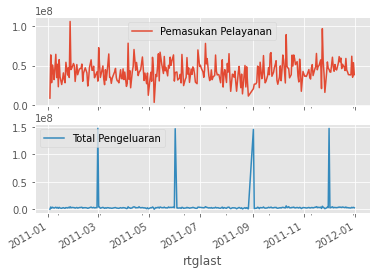

In [ ]:
df_deret_waktu_1[['Pemasukan Pelayanan','Total Pengeluaran']].plot(subplots = True)
plt.show()

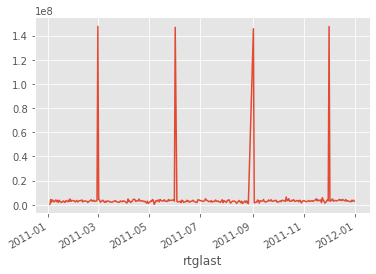

In [ ]:
df_deret_waktu_1['Total Pengeluaran'].plot()
plt.show()

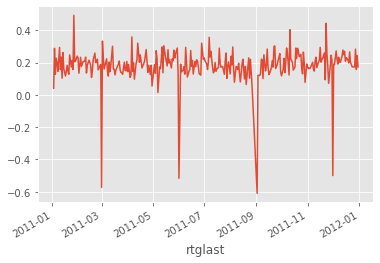

In [ ]:
df_deret_waktu_1['Rate of Return'].plot()
plt.show()